In [189]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# First, look at everything.
from subprocess import check_output


In [190]:
# Para correr en kaggle descomentar 

In [191]:
#  Pick a Dataset you might be interested in.
#  Say, all airline-safety files...

#import zipfile

#Dataset = "college-majors"

# Will unzip the files so that you can see them..
#with zipfile.ZipFile("../input/data/"+Dataset+".zip","r") as z:
#    z.extractall(".")

In [192]:
#from subprocess import check_output
#print(check_output(["ls", "college-majors"]).decode("utf8"))

### Descripcion de cada una de las variables del dataset

---

###### Aclaraciones

- Las variables descriptas cuyo nombre comienza por \*  implica que la definicion del tipo de variable y la descripcion
de la misma pueden darse de igual manera para las variables del dataset que se obtengan reemplazando \* por **Grad** o bien por **Nongrad**
- Se entiende por Grad, personas que poseen un titulo de posgrado *(master o doctorado)*. Segun la definicion de [Graduate student](https://educationusa.state.gov/your-5-steps-us-study/research-your-options/graduate/what-graduate-student)
- Se entiende por Nongrad, personas que poseen unicamente un *titulo de grado*, equivalente a **Undergraduate student**. Segun la definicion de [Undergraduate student](https://educationusa.state.gov/your-5-steps-us-study/research-your-options/undergraduate/what-us-undergraduate-student)

---

-   Major_code:
    - Variable categorica
    - Codigo de la carrera de grado
-   Major:
    - Variable categorica
    - Nombre de la carrera de grado
-   Major_category:
    - Variable categorica
    - Disciplina de la carrera de grado: ej. Ingenieria
-   \*_total
    - Variable cuantitativa
    - Total de graduados
-   \*_sample_size
    - Variable cuantitativa
    - Tamaño de la muestra
-   \*_employed
    - Variable cuantitativa
    - Total de graduados con empleo
-   \*_full_time_year_round
    - Variable cuantitativa
    - Total de graduados con empleo full time durante al menos 35 semanas
-   \*_unemployed
    - Variable cuantitativa
    - Total de graduados sin empleo
-   \*_unemployment_rate
    - Variable cuantitativa
    - Tasa de desempleo de los graduados (\*\_unemployed / (\*\_unemployed + \*\_employed)
-   \*_median
    - Variable cuantitativa
    - Mediana del ingreso anual de los graduados (en dolares)
-   \*_P25
    - Variable cuantitativa
    - Cuantil 25 del ingreso anual de los graduados (en dolares)
-   \*_P75
    - Variable cuantitativa
    - Cuantil 75 del ingreso anual de los graduados (en dolares)
-   Grad_share
    - Variable cuantitativa
    - Porcentaje de graduados de la carrera de grado que poseen un titulo de posgrado (master/doctorado)
-   Grad_premium
    - Variable cuantitativa
    - pocentaje extra de ingresos medios de graduados de esa carrera con titulo de master o doctorado:
        - (Grad_median / Nongrad_median) - 1

## Resumen del dataset

A continuacion se muestran las primeras 5 entradas del set de datos:
 

In [193]:
# There's only one file above...we'll select it.
# Para correr en kaggle descomentar 
#students=pd.read_csv(Dataset+"/grad-students.csv") #Comentado 12/4 para poder

# Para correr en Colab descomentar
students = pd.read_csv('/content/grad-students.csv')
students.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


A continuacion, se muestran las ultimas 5 entradas del set de datos

In [194]:
students.tail()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
168,5203,COUNSELING PSYCHOLOGY,Psychology & Social Work,51812,724,38468,28808,1420,0.035600,50000.0,...,16781,12377,8502,835,0.063200,40000.0,25000,50000.0,0.755354,0.250000
169,5202,CLINICAL PSYCHOLOGY,Psychology & Social Work,22716,355,16612,12022,782,0.044958,70000.0,...,6519,4368,3033,357,0.075556,46000.0,30000,70000.0,0.777014,0.521739
170,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,114971,1766,78132,58825,1732,0.021687,135000.0,...,26320,16221,12185,1012,0.058725,51000.0,35000,87000.0,0.813718,1.647059
171,2303,SCHOOL STUDENT COUNSELING,Education,19841,260,11313,8130,613,0.051400,56000.0,...,2232,1328,980,169,0.112892,42000.0,27000,51000.0,0.898881,0.333333
172,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,54159,841,34142,26850,582,0.016761,65000.0,...,4003,3079,2434,0,0.000000,58000.0,45000,79000.0,0.931175,0.120690


## Info de las columnas

A continuacion, se muestra la informacion con info().
Se puede observar el tipo de datos contenido en cada una de las columnas y la cantidad de valores no nulos que posee cada una

In [195]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Major_code                    173 non-null    int64  
 1   Major                         173 non-null    object 
 2   Major_category                173 non-null    object 
 3   Grad_total                    173 non-null    int64  
 4   Grad_sample_size              173 non-null    int64  
 5   Grad_employed                 173 non-null    int64  
 6   Grad_full_time_year_round     173 non-null    int64  
 7   Grad_unemployed               173 non-null    int64  
 8   Grad_unemployment_rate        173 non-null    float64
 9   Grad_median                   173 non-null    float64
 10  Grad_P25                      173 non-null    int64  
 11  Grad_P75                      173 non-null    float64
 12  Nongrad_total                 173 non-null    int64  
 13  Nongr

Se muestra el shape del set de datos. Que indica:

- (cantidad de filas, cantidad de columnas)

In [196]:
students.shape

(173, 22)

Mirando la salida de info() y shape, se puede inferir que no hay valores nulos en el set de datos

### Cantidad de valores nulos por columna

Para comprobar que no hay valores nulos en ninguna de las columnas, se ejecuta el siguiente codigo:

In [197]:
students.isnull().sum()

Major_code                      0
Major                           0
Major_category                  0
Grad_total                      0
Grad_sample_size                0
Grad_employed                   0
Grad_full_time_year_round       0
Grad_unemployed                 0
Grad_unemployment_rate          0
Grad_median                     0
Grad_P25                        0
Grad_P75                        0
Nongrad_total                   0
Nongrad_employed                0
Nongrad_full_time_year_round    0
Nongrad_unemployed              0
Nongrad_unemployment_rate       0
Nongrad_median                  0
Nongrad_P25                     0
Nongrad_P75                     0
Grad_share                      0
Grad_premium                    0
dtype: int64

Con esto, queda comprobado que no existen valores nulos en ninguna de las columnas del dataset.

# Variables Cualitativas 

## Se muestran los distintos valores existentes respecto a las columnas cualitativas y la cantidad de filas correspondientes a cada uno.

In [198]:
qualitative_students = students[['Major', 'Major_code', 'Major_category']]
qualitative_students

,Major,Major_code,Major_category
0,CONSTRUCTION SERVICES,5601,Industrial Arts & Consumer Services
1,COMMERCIAL ART AND GRAPHIC DESIGN,6004,Arts
2,HOSPITALITY MANAGEMENT,6211,Business
3,COSMETOLOGY SERVICES AND CULINARY ARTS,2201,Industrial Arts & Consumer Services
4,COMMUNICATION TECHNOLOGIES,2001,Computers & Mathematics
...,...,...,...
168,COUNSELING PSYCHOLOGY,5203,Psychology & Social Work
169,CLINICAL PSYCHOLOGY,5202,Psychology & Social Work
170,HEALTH AND MEDICAL PREPARATORY PROGRAMS,6106,Health
171,SCHOOL STUDENT COUNSELING,2303,Education


### Muestra de todos los valores de "Major" y la cantidad de filas asociadas a cada valor

In [199]:
qualitative_students['Major'].unique()

array(['CONSTRUCTION SERVICES', 'COMMERCIAL ART AND GRAPHIC DESIGN',
       'HOSPITALITY MANAGEMENT', 'COSMETOLOGY SERVICES AND CULINARY ARTS',
       'COMMUNICATION TECHNOLOGIES', 'COURT REPORTING',
       'MARKETING AND MARKETING RESEARCH',
       'AGRICULTURE PRODUCTION AND MANAGEMENT',
       'COMPUTER PROGRAMMING AND DATA PROCESSING',
       'ADVERTISING AND PUBLIC RELATIONS',
       'FILM VIDEO AND PHOTOGRAPHIC ARTS',
       'ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLOGIES AND PRODUCTION',
       'MECHANICAL ENGINEERING RELATED TECHNOLOGIES', 'MASS MEDIA',
       'TRANSPORTATION SCIENCES AND TECHNOLOGIES',
       'COMPUTER NETWORKING AND TELECOMMUNICATIONS',
       'MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION',
       'MISCELLANEOUS ENGINEERING TECHNOLOGIES',
       'INDUSTRIAL PRODUCTION TECHNOLOGIES', 'MISCELLANEOUS FINE ARTS',
       'CRIMINAL JUSTICE AND FIRE PROTECTION',
       'BUSINESS MANAGEMENT AND ADMINISTRATION', 'CRIMINOLOGY',
       'MANAGEMENT INFORMATION SYS

Se observa que en la serie Major existen muchos valores únicos por lo que en principio se muestran la cantidad de repeticiones de cada uno de los valores 

In [200]:
counts = qualitative_students['Major'].value_counts()
counts

CONSTRUCTION SERVICES                          1
PSYCHOLOGY                                     1
MATERIALS ENGINEERING AND MATERIALS SCIENCE    1
ANTHROPOLOGY AND ARCHEOLOGY                    1
SOCIAL WORK                                    1
                                              ..
ENGINEERING AND INDUSTRIAL MANAGEMENT          1
COMPUTER SCIENCE                               1
HEALTH AND MEDICAL ADMINISTRATIVE SERVICES     1
AGRICULTURAL ECONOMICS                         1
EDUCATIONAL ADMINISTRATION AND SUPERVISION     1
Name: Major, Length: 173, dtype: int64

A continuación se muestran la cantidad de valores únicos 

In [201]:
counts.unique()

array([1])

Dado que existe un único valor para cada uno de las categorias de la serie Major se decide no realizar un gráfico de barras para comparar la cantidad de filas pertenecientes a cada una de estos valores dada que son todos los mismos.

### Muestra de todos los valores de "Major_code" y la cantidad de filas asociadas a cada valor

In [202]:
qualitative_students['Major_code'].unique()


array([5601, 6004, 6211, 2201, 2001, 3201, 6206, 1101, 2101, 1904, 6005,
       5701, 2504, 1903, 5901, 2107, 6299, 2599, 2503, 6099, 5301, 6203,
       5503, 6212, 2106, 6204, 6200, 6105, 2100, 1901, 6202, 2502, 1902,
       6104, 2500, 6201, 6000, 6107, 2105, 2403, 4000, 5102, 1100, 1302,
       3401, 5403, 6003, 1303, 6007, 2901, 4101, 6207, 2419, 1105, 6209,
       6210, 3302, 6001, 6205, 2501, 2102, 6103, 1102, 1301, 5504, 2499,
       3604, 4007, 1401, 1106, 3202, 2400, 5098, 2406, 2407, 2416, 2307,
       5507, 5500, 1103, 6109, 1199, 2414, 3402, 1104, 2412, 2411, 5206,
       2417, 4005, 6006, 6199, 6100, 4001, 4002, 5501, 2306, 6110, 2408,
       4901, 5006, 2399, 2402, 5401, 2304, 5205, 3801, 2300, 6002, 2314,
       2601, 2413, 5502, 5404, 3301, 2312, 5004, 6108, 2603, 5200, 1501,
       5000, 5002, 2405, 2401, 6402, 5599, 3701, 3702, 2602, 2311, 3700,
       5506, 5505, 2410, 3699, 5299, 2415, 2309, 5005, 6403, 2409, 4006,
       2313, 2418, 5402, 2305, 2308, 3606, 4801, 23

In [203]:
counts = qualitative_students['Major_code'].value_counts()
counts

5601    1
5200    1
2413    1
5502    1
5404    1
       ..
2501    1
2102    1
6103    1
1102    1
2301    1
Name: Major_code, Length: 173, dtype: int64

In [204]:
counts.unique()

array([1])

Por las mismas razones que se encuentran en la sección de la serie mayor se decide no realizar comparaciones con el gráfico de barras.

### Muestra de todos los valores de "Major_category" y la cantidad de filas asociadas a cada valor

In [205]:
qualitative_students['Major_category'].unique()


array(['Industrial Arts & Consumer Services', 'Arts', 'Business',
       'Computers & Mathematics', 'Law & Public Policy',
       'Agriculture & Natural Resources', 'Communications & Journalism',
       'Engineering', 'Social Science', 'Health', 'Interdisciplinary',
       'Physical Sciences', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Biology & Life Science', 'Education'],
      dtype=object)

In [206]:
qualitative_students['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

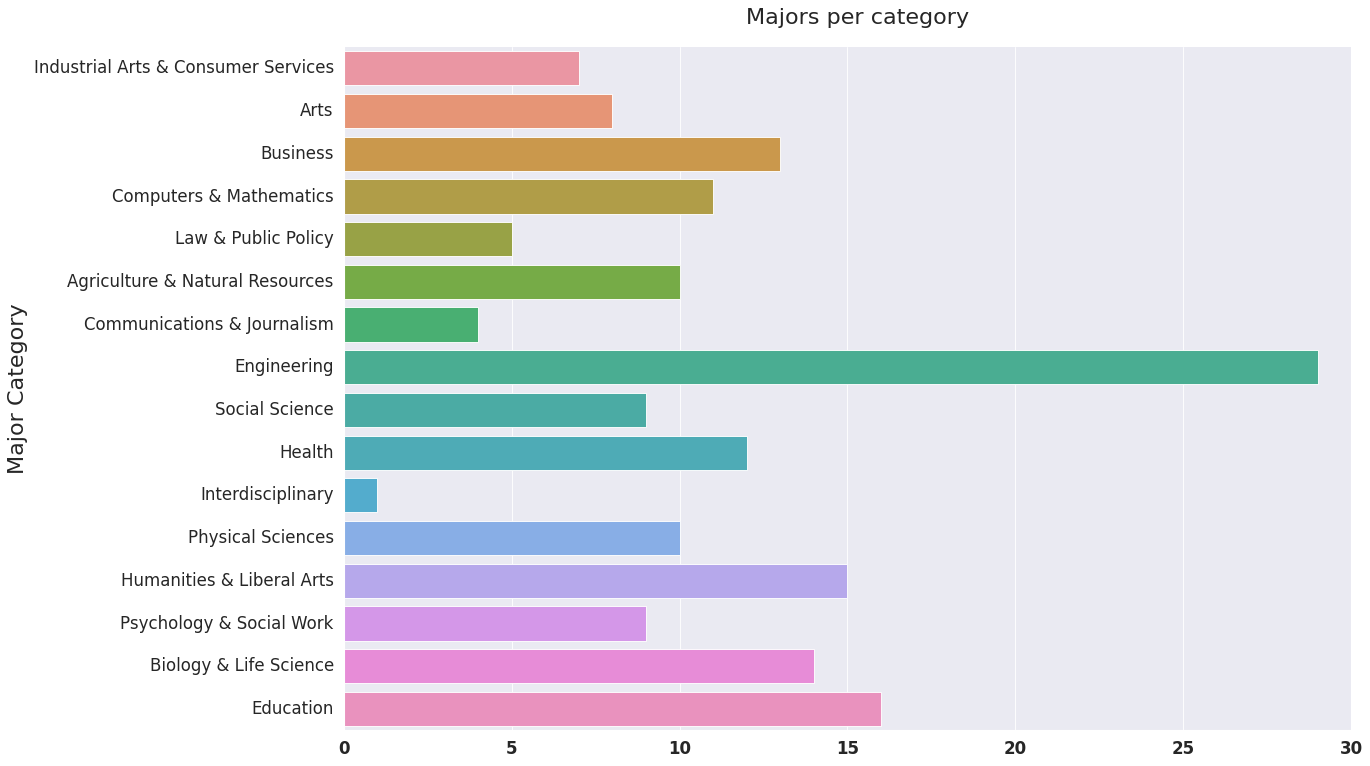

In [207]:
sns.set_context('paper', font_scale=1)

sns.set_style('darkgrid')

fig = sns.catplot(data=qualitative_students, y="Major_category",
                kind="count")

fig.figure.set_size_inches(30, 10)

fig.figure.suptitle("Majors per category", x=0.75, y=1.02, fontsize = 20)

fig.ax.set_ylabel(
    ylabel = "Major Category",
    fontsize = 20,
)

fig.ax.set_yticklabels(fig.ax.get_yticklabels(),
                        fontsize = 15)

fig.ax.set_xlabel(
    xlabel = "",
    fontsize = 20
)

fig.ax.set_xticklabels(fig.ax.get_xticklabels(),
                       fontsize = 15,
                       fontweight = 'bold'
)


plt.show()

### **Es posible realizar este grafico con un histograma ?**

No es posible realizar un histograma en ninguno de los tres casos. Porque el histograma se puede realizar sobre variables cuantitativas pero estamos utilizando variables cualitativas

### **Explique las diferencias entre estos dos tipos de gráficos.**

- El histograma se utiliza para mostrar la distribución de datos numéricos mientras que el gráfico de barras se puede utilizar para comparar distintos datos categoricos (no necesariamente frecuencias).
- El histograma se utiliza para mostrar la distribución de variables no discretas, en cambio para variables discretas se utiliza el gráfico en barras.
- En el caso de un gráfico de barras, es bastante común reorganizar los bloques, de mayor a menor. Pero con el histograma, esto no se puede hacer, ya que se muestran en las secuencias de las clases.

# Variables Cuantitativas

## 1) Medidas de resumen
A continuación se realizan sobre variables de este tipo los calculos de las siguientes medidas de resumen y se arma un nuevo dataframe con los mismos.

- Media
- Mediana
- Moda
- Primer y tercer cuartil
- Rango


In [208]:
description = students.describe()
description.drop(["count", "std", "min", "max"], inplace=True, axis='index')
description

,Major_code,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
mean,3879.815029,127672.023121,2250.872832,94037.034682,72861.184971,3506.427746,0.039343,76755.780347,52596.508671,112087.34104,214720.312139,154553.520231,120736.820809,8486.323699,0.053947,58583.815029,40078.179191,84332.947977,0.400595,0.328505
25%,2403.000000,15284.000000,314.000000,12659.000000,9894.000000,453.000000,0.026068,65000.000000,45000.000000,93000.00000,20564.000000,15914.000000,11755.000000,880.000000,0.041981,48700.000000,34000.000000,72000.000000,0.267567,0.230769
50%,3608.000000,37872.000000,688.000000,28930.000000,22523.000000,1179.000000,0.036654,75000.000000,50000.000000,108000.00000,68993.000000,50092.000000,38384.000000,3157.000000,0.051031,55000.000000,38000.000000,80000.000000,0.398745,0.320755
75%,5503.000000,148255.000000,2528.000000,109944.000000,80794.000000,3329.000000,0.048051,90000.000000,60000.000000,130000.00000,184971.000000,129179.000000,103629.000000,7409.000000,0.064387,65000.000000,44000.000000,97000.000000,0.499117,0.400000


In [209]:
#agrego iqr
description = description.transpose()
description["iqr"] = description["75%"] - description["25%"]

description.rename(columns={'50%': 'median'}, inplace=True)

In [210]:
modes = students.mode(axis='index', numeric_only=True).transpose()

description["mode"] = modes[0]

description = description.transpose().drop("Major_code", axis='columns')

description

,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
mean,127672.023121,2250.872832,94037.034682,72861.184971,3506.427746,0.039343,76755.780347,52596.508671,112087.34104,214720.312139,154553.520231,120736.820809,8486.323699,0.053947,58583.815029,40078.179191,84332.947977,0.400595,0.328505
25%,15284.000000,314.000000,12659.000000,9894.000000,453.000000,0.026068,65000.000000,45000.000000,93000.00000,20564.000000,15914.000000,11755.000000,880.000000,0.041981,48700.000000,34000.000000,72000.000000,0.267567,0.230769
median,37872.000000,688.000000,28930.000000,22523.000000,1179.000000,0.036654,75000.000000,50000.000000,108000.00000,68993.000000,50092.000000,38384.000000,3157.000000,0.051031,55000.000000,38000.000000,80000.000000,0.398745,0.320755
75%,148255.000000,2528.000000,109944.000000,80794.000000,3329.000000,0.048051,90000.000000,60000.000000,130000.00000,184971.000000,129179.000000,103629.000000,7409.000000,0.064387,65000.000000,44000.000000,97000.000000,0.499117,0.400000
iqr,132971.000000,2214.000000,97285.000000,70900.000000,2876.000000,0.021983,25000.000000,15000.000000,37000.00000,164407.000000,113265.000000,91874.000000,6529.000000,0.022406,16300.000000,10000.000000,25000.000000,0.231550,0.169231
mode,1542.000000,98.000000,1008.000000,770.000000,112.000000,0.000000,65000.000000,50000.000000,100000.00000,2232.000000,1328.000000,980.000000,0.000000,0.000000,50000.000000,35000.000000,75000.000000,0.096320,0.333333


## 2. Correlación de atributos

### Exploración de las variables cuantitativas, tomándolas de a pares utilizando un gráfico scatter_matrix

Las siguientes variables son elegidas para graficarlas de a pares, utilizando scatter plots y en las diagonales histogramas, ya que se considera que representan al dataset y al objetivo del mismo de la forma mas abarcativa. Teniendo en cuenta que el [articulo](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/), que se escribio utilizando el dataset, busca:

1. Aconsejar sobre cuales carreras de grado maximizan los ingresos del graduado comparando las orientaciones de las mismas (Ingenieria, Ciencias Sociales, etc).
2. Analizar las diferencias entre graduados de diferentes sexos.
3. Comparar las diferencias de ingresos segun carrera y grado de estudio (posgrado vs. grado).

Tomando esto en cuenta y sabiendo que el dataset que nos compete es el unico dentro de los datasets de *College-majors* que compara graduados con titulo de grado y posgrado.

##### Se eligen las siguientes variables:

---

- Grad_premium
- Grad_share
- Grad_median
- Nongrad_median
- Grad_unemployment_rate
- Nongrad_unemployment_rate

---

##### Mientras que se descartan, por las razones detalladas a continuacion las variables:

---

- Grad_sample_size y Nongrad_sample_size
    - No se eligen estas variables debido a que no son representativos para el objetivo antes descrito.

- Grad_total y Nongrad_total
    - No se eligen estas variables debido a que estan representadas por la variable *Grad_share*

- Grad_employed/Grad_full_time_year_round y Grad_unemployed
    - No se eligen estas variables por que estan representadas por la variable elegida *Grad_unemployment_rate*

- Nongrad_employed/Nongrad_full_time_year_round y Nongrad_unemployed
    - Igual que en el caso anterior, estas variables estan representadas por la variable analoga *Nongrad_unemployment_rate*

- Cuantiles (Grad_P75, Grad_P25, Nongrad_P75 y Nongrad_P25)
    - No se eligen estas variables debido a que se elige la mediana como modo de representacion de los ingresos de graduados de posgrado y grado.

---

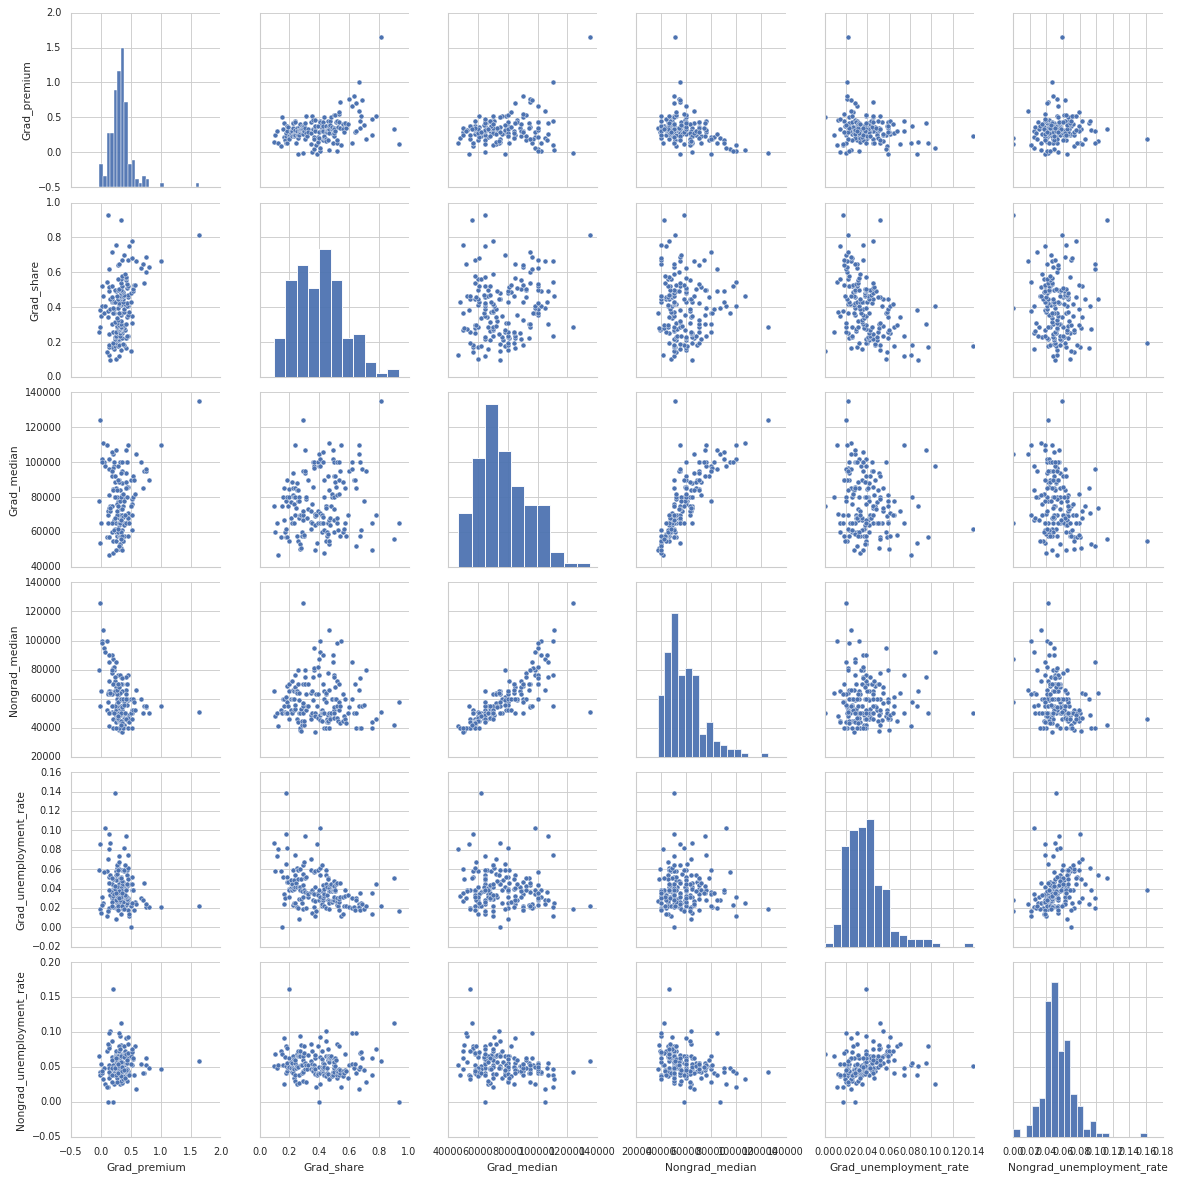

In [211]:
#Gráficos de a pares de variables con Pandas
sns.set_style("whitegrid")
sns.set_context('paper', font_scale=1)

vars = ["Grad_premium", "Grad_share", "Grad_median", "Nongrad_median", "Grad_unemployment_rate", "Nongrad_unemployment_rate"]

students_without_col = students[vars]

grid = sns.pairplot(
                    data=students_without_col,
                    vars = vars,
                    kind="scatter"
                    )

grid.map_diag(sns.histplot)


plt.show()


### Cálculo de la correlación de Pearson y gráfico de la misma

A continuación se realiza el cálculo de la correlación de Pearson y se grafica la misma en forma de heatmap.

,Grad_premium,Grad_share,Grad_median,Nongrad_median,Grad_unemployment_rate,Nongrad_unemployment_rate
Grad_premium,1.000000,0.366820,0.208806,-0.386530,-0.207234,0.062333
Grad_share,0.366820,1.000000,0.154882,-0.042178,-0.404447,-0.079389
Grad_median,0.208806,0.154882,1.000000,0.812758,-0.138856,-0.293275
Nongrad_median,-0.386530,-0.042178,0.812758,1.000000,-0.029934,-0.304915
Grad_unemployment_rate,-0.207234,-0.404447,-0.138856,-0.029934,1.000000,0.236663
Nongrad_unemployment_rate,0.062333,-0.079389,-0.293275,-0.304915,0.236663,1.000000


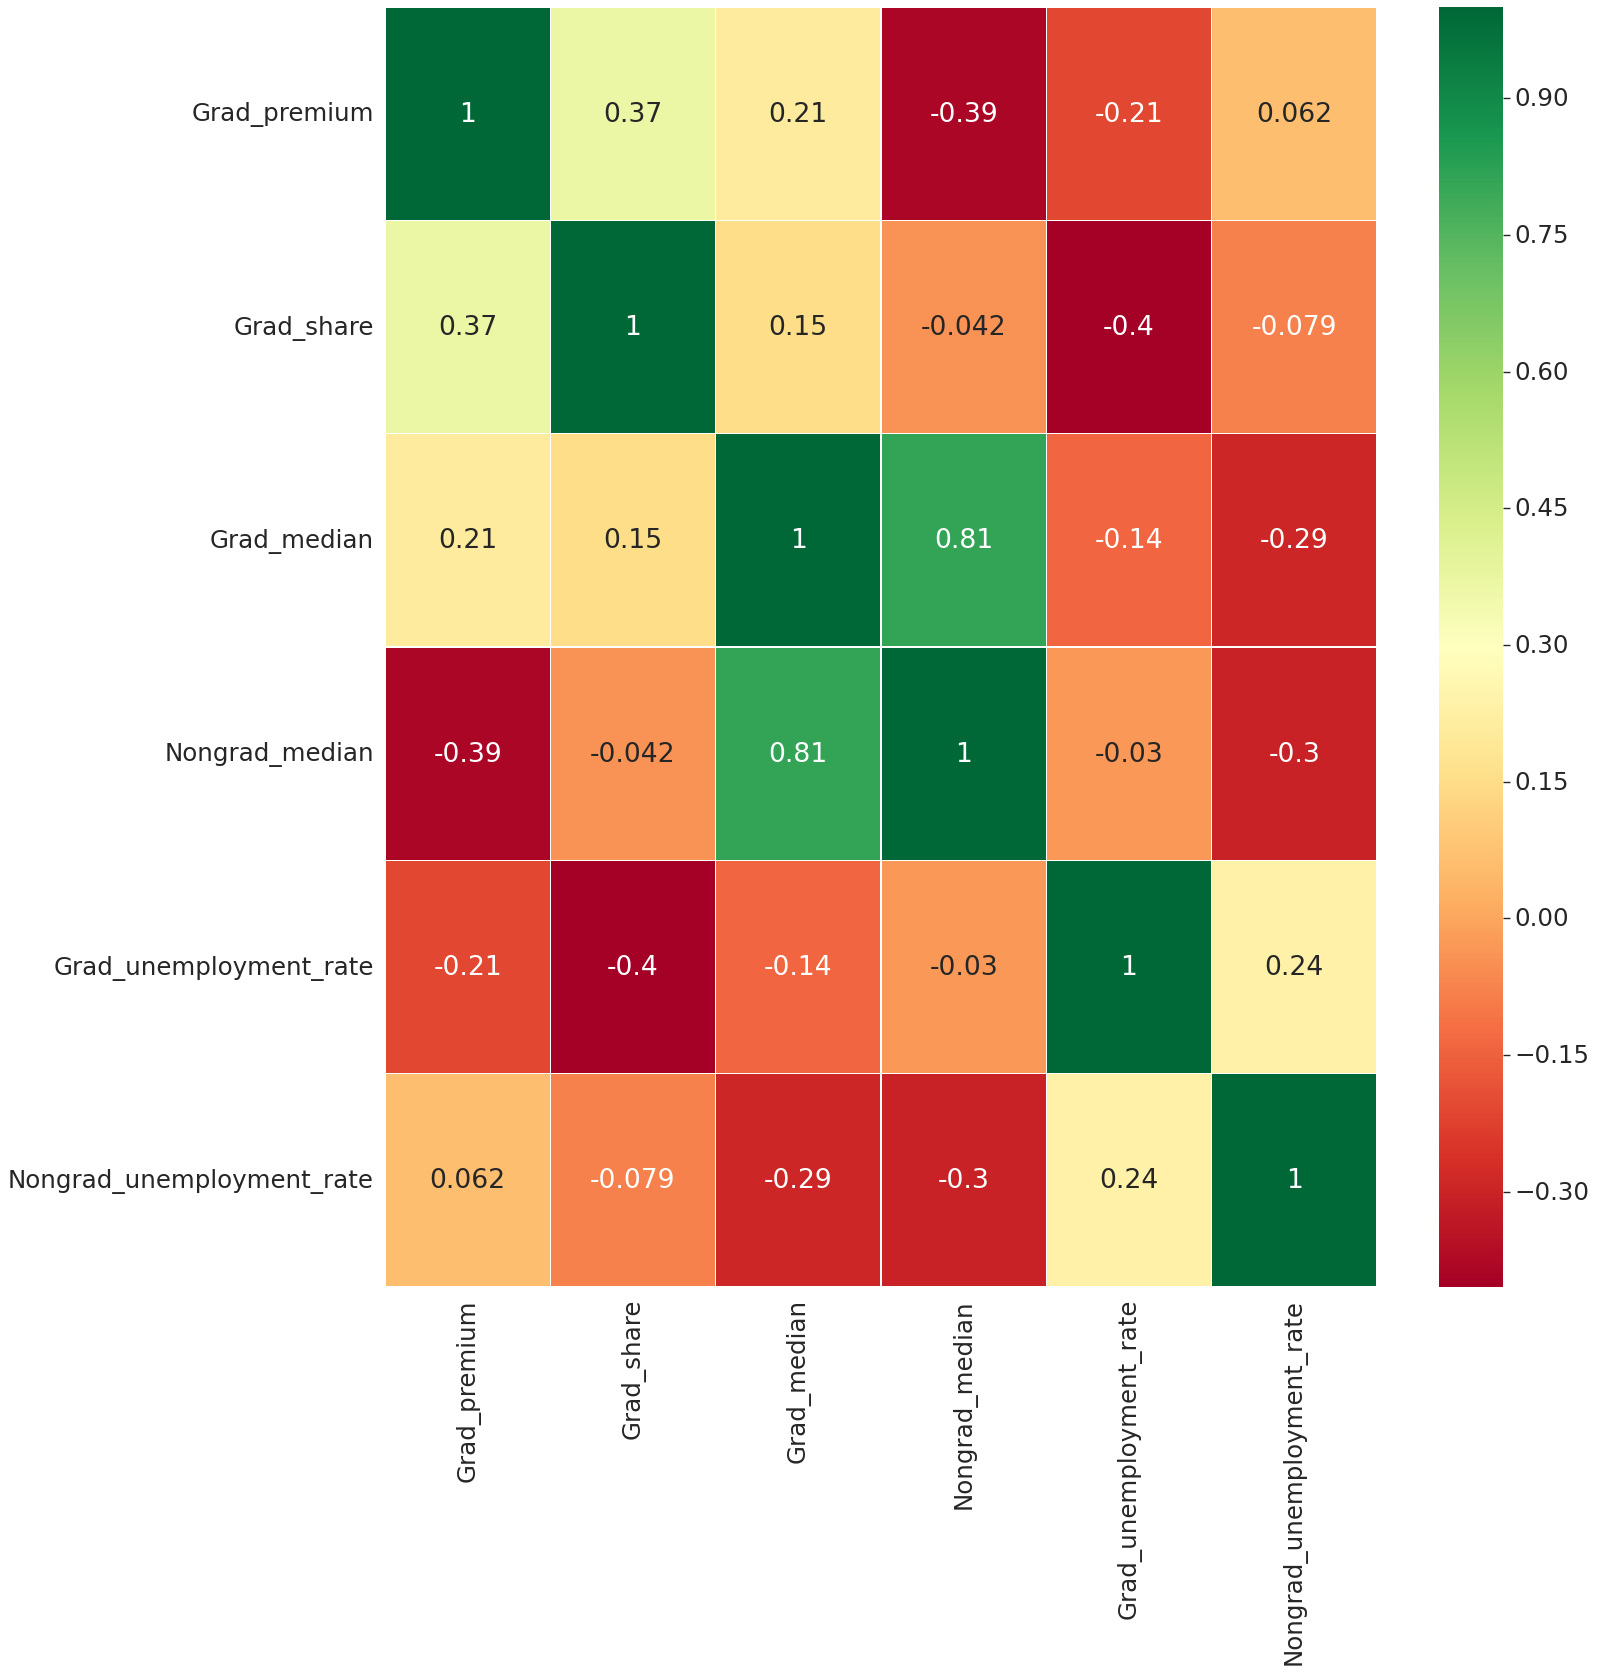

In [212]:
import seaborn as sns

correlaciones = students_without_col.corr()
display(correlaciones)

sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(20,20))
grf=sns.heatmap(correlaciones,annot=True, linewidths=.5, ax=ax, cmap = sns.color_palette("RdYlGn", as_cmap=True))

Con el fin de poder observar alguna correlación lineal entre variables que no se haya podido observar debido a la reducción de las mismas. Se grafica a continuación un heatmap con las correlaciones entre todas las variables cuantitativas del dataset

,Major_code,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
Major_code,1.000000,0.095451,0.121963,0.117735,0.127684,0.163998,0.134206,0.008459,-0.077684,0.071089,0.179722,0.194579,0.194436,0.200125,0.205042,-0.149670,-0.141399,-0.092157,-0.019284,0.255693
Grad_total,0.095451,1.000000,0.982137,0.992306,0.980089,0.936666,-0.111950,0.008317,0.010429,0.049837,0.807979,0.764224,0.731108,0.743246,-0.064865,-0.089054,-0.065528,-0.085143,0.081207,0.157328
Grad_sample_size,0.121963,0.982137,1.000000,0.995567,0.997142,0.948576,-0.108108,0.067963,0.057823,0.112678,0.815635,0.787060,0.763896,0.774614,-0.059095,-0.042328,-0.022919,-0.033244,0.070709,0.167384
Grad_employed,0.117735,0.992306,0.995567,1.000000,0.995330,0.948621,-0.109514,0.038448,0.032112,0.083643,0.813859,0.780418,0.752793,0.765287,-0.058947,-0.066691,-0.046025,-0.059959,0.072857,0.164951
Grad_full_time_year_round,0.127684,0.980089,0.997142,0.995330,1.000000,0.954965,-0.103349,0.077038,0.065184,0.118990,0.829320,0.802996,0.782452,0.788851,-0.059904,-0.032006,-0.014061,-0.023348,0.059805,0.162571
Grad_unemployed,0.163998,0.936666,0.948576,0.948621,0.954965,1.000000,0.004597,0.025488,0.009289,0.066529,0.863304,0.843102,0.828060,0.871788,0.011279,-0.051821,-0.051345,-0.022798,-0.006270,0.108813
Grad_unemployment_rate,0.134206,-0.111950,-0.108108,-0.109514,-0.103349,0.004597,1.000000,-0.138856,-0.174589,-0.135010,-0.004280,0.006807,0.013982,0.058464,0.236663,-0.029934,-0.092478,0.014580,-0.404447,-0.207234
Grad_median,0.008459,0.008317,0.067963,0.038448,0.077038,0.025488,-0.138856,1.000000,0.915248,0.900445,-0.009722,0.007937,0.036256,-0.016613,-0.293275,0.812758,0.766805,0.837764,0.154882,0.208806
Grad_P25,-0.077684,0.010429,0.057823,0.032112,0.065184,0.009289,-0.174589,0.915248,1.000000,0.711321,-0.010183,0.002833,0.026280,-0.037237,-0.349639,0.864663,0.865554,0.821773,0.113327,-0.008763
Grad_P75,0.071089,0.049837,0.112678,0.083643,0.118990,0.066529,-0.135010,0.900445,0.711321,1.000000,-0.002954,0.013171,0.038534,0.008343,-0.177716,0.589929,0.517326,0.676786,0.224569,0.447764


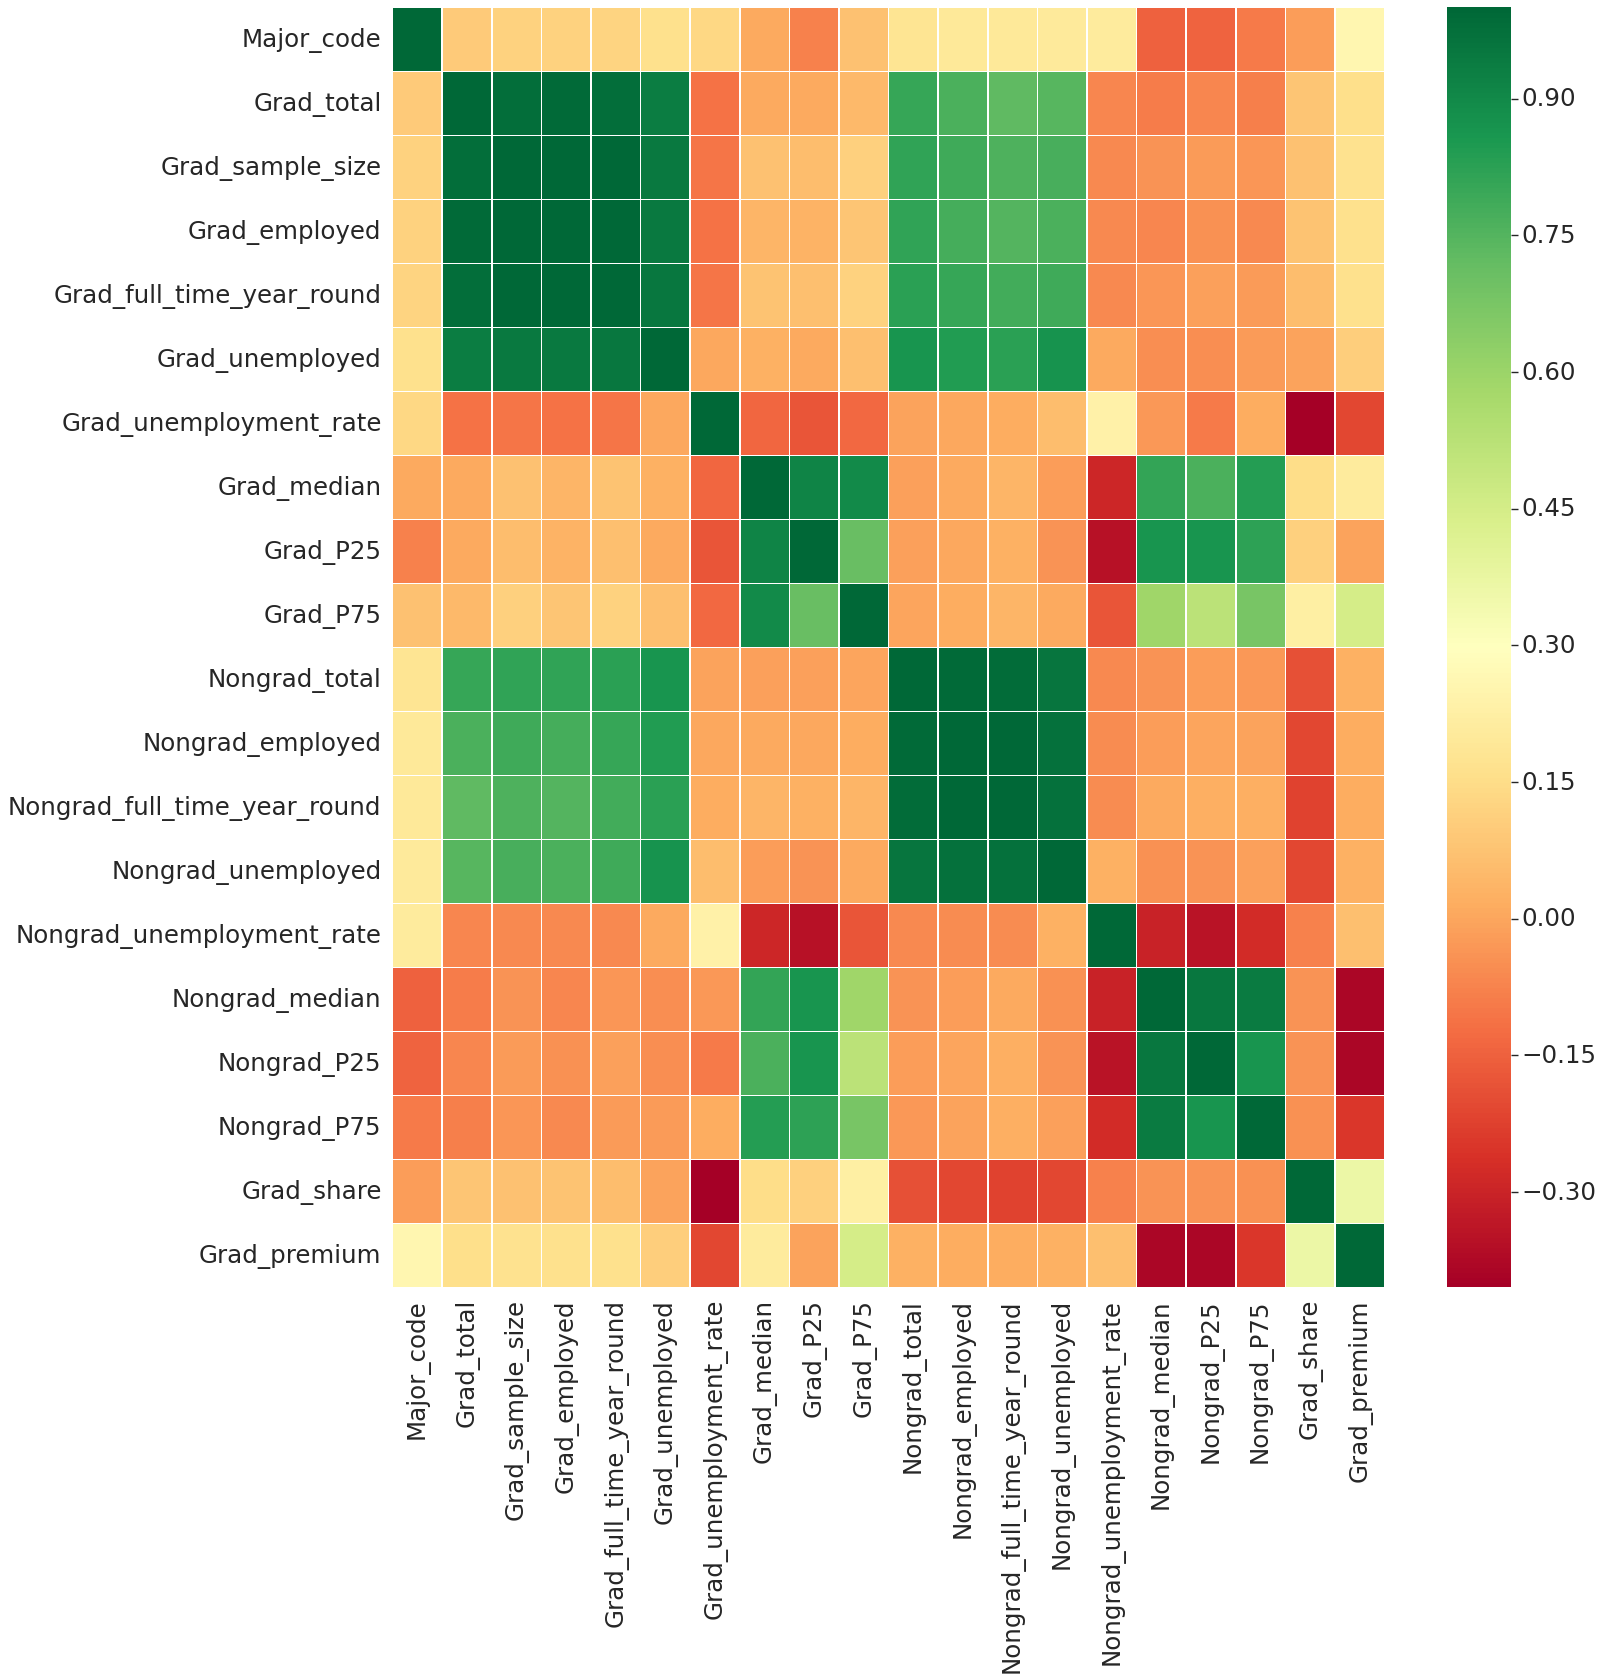

In [213]:
correlaciones = students.corr()
display(correlaciones)

sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(20,20))
grf=sns.heatmap(correlaciones,annot=False, linewidths=.5, ax=ax, cmap = sns.color_palette("RdYlGn", as_cmap=True))

# 3. Visualizaciones


---

## **Violin Plot**

En el siguiente violin plot compararemos la ganancia media entre los grad y nongrad students de la categoría **Engineering**

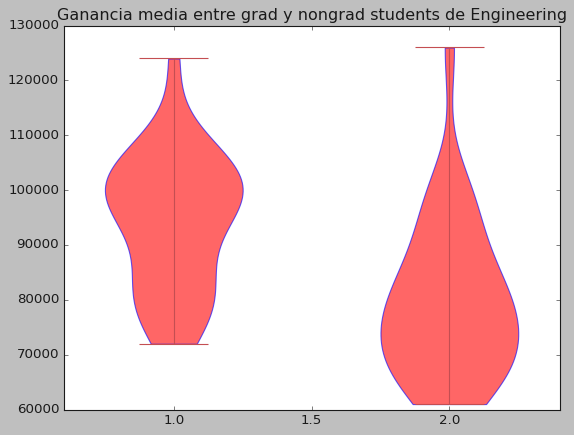

In [214]:
plt.style.use('classic')

#engineering_students = students.drop(students[(students['Major_category'] != 'Engineering')].index)
engineering_students = students.query("Major_category == 'Engineering'")


fig, ax = plt.subplots()
violin_parts = ax.violinplot([engineering_students['Grad_median'], engineering_students['Nongrad_median']])

# Add title

ax.set_title('Ganancia media entre grad y nongrad students de Engineering')

for bp in violin_parts['bodies']:
  bp.set_facecolor('red')
  bp.set_edgecolor('blue')
  bp.set_alpha(0.6)

plt.show()

Facilmente se observa que la mayoría de los nongrad students tienen una ganancia media de 70000, mientras que los grad students tienen una ganancia media de 100000. Cabe aclarar que el máximo de ganancia es más alto en los nongrad students que en los grad students

---

## **Box Plot**

Para el gráfico de boxplots vamos a comparar la cantidad de graduados con un titulo de major sobre el total de graduados.
Para esto seleccionamos las siguientes major categorys:

- **Engineering**
- **Education**
- **Business**

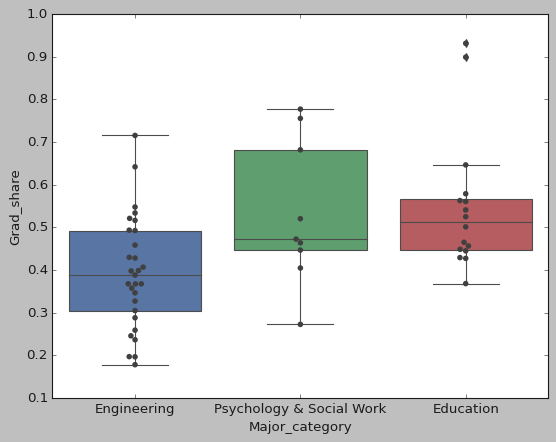

In [215]:
Reduce_students = students.query("Major_category == 'Engineering' or Major_category == 'Education' or Major_category == 'Psychology & Social Work'")

ax = sns.boxplot(x = Reduce_students['Major_category'] , y = Reduce_students['Grad_share'])
#Use swarmplot() to show the datapoints on top of the boxes:
ax = sns.swarmplot(x = Reduce_students['Major_category'],  y = Reduce_students['Grad_share'], data= Reduce_students, color=".25")

plt.show()
# arreglar 23/4

Se observa que en la major category de Business se encuentran pocos graduados con major sobre el total de graduados. En Engineering, si bien una de las 29 majors tiene el mayor porcentaje de grad studens sobre el total de estudiantes (lo destaca el punto máximo de la greenbox) su promedio es menor al de Education siendo esta la major category con mayor porcentaje de grad de students

---

## **Histograma**

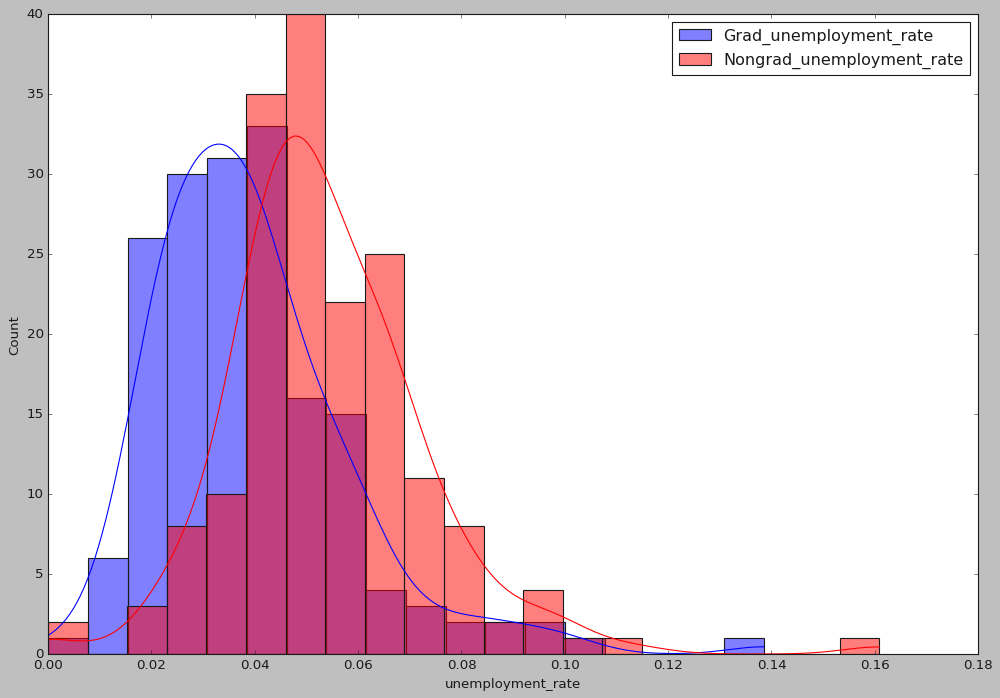

In [216]:
Education_students = students.query("Major_category == 'Engineering'")

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax.set_xlabel('unemployment_rate') 
sns.histplot(data=students['Grad_unemployment_rate'], kde=True, color = 'blue', label = 'Grad_unemployment_rate')
sns.histplot(data=students['Nongrad_unemployment_rate'], kde=True, color ='red', label = 'Nongrad_unemployment_rate')
plt.legend()
plt.show()

Podemos ver que el porcentaje de desempleados es chico para ambos casos, siendo el máximo 16%, observamos que hay más frecuencia entre el 2% y el 4% para los grad students mientras que para los nongrad students la frecuencia de desempleo aumenta entre el 4 y el 8 porciento. De esta manera se ve que hay un mayor porcentaje de desempleados para aquellos estudiantes que no se reciben con una major

---

## **Density Plot**

En el siguiente grafico de densidad compararemos la ganancia media entre los grad students de engineering, que es la categoría que más majors abarca dentro del dataset, contra los grad students de computers & mathematics, siendo este ultimo una categoria que abarca menos de la mitad que engineering.

De esta forma se visualizará mejor la densidad

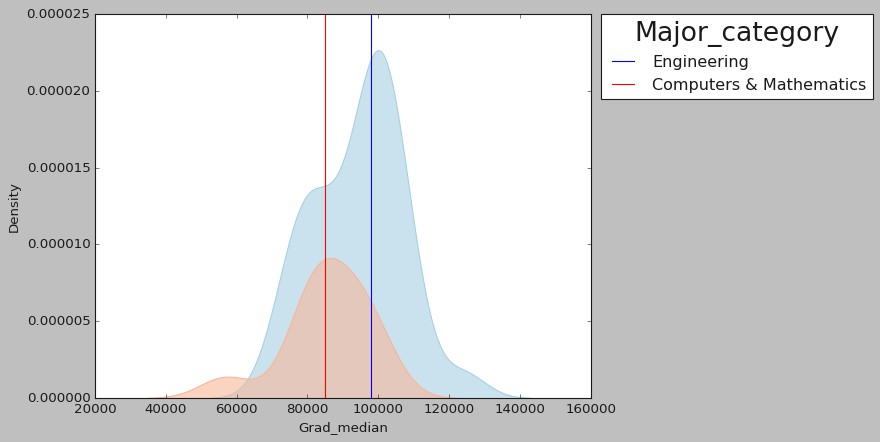

In [217]:
Density_Engineering_vs_Computers = students.query("Major_category == 'Engineering' or Major_category == 'Computers & Mathematics'")

engineering = students.query("Major_category == 'Engineering'")

computers_students = students.query("Major_category == 'Computers & Mathematics'")

plt.axvline(np.median(engineering['Grad_median']), c = "blue")
plt.axvline(np.median(computers_students['Grad_median']), c = "red")

sns.kdeplot(data=Density_Engineering_vs_Computers, x="Grad_median", hue="Major_category", alpha=0.6, fill=True, palette= 'RdBu',legend = True)

# Chequear la media para cada uno y arreglar el legend
plt.legend(bbox_to_anchor = (1.02,1), loc='upper left', borderaxespad=0, title = 'Major_category', labels = ["Engineering","Computers & Mathematics"])
#plt.legend(bbox_to_anchor = (1.02,1),loc= "upper left")
plt.show()


Al haber más majors dentro de la categoria de Engineering hay mayor densidad entre los 60000 y 120000 de ganancia media. Dicho esto, Engineering se extiende tambien hasta los 140000, 20000 más que los pocos grad students de Computers & Mathematics que alcanzan el máximo de ganancia dentro de su categoria

![](https://cdn.discordapp.com/attachments/955607461497282644/963578308862300210/unknown.png)

Observando la imagen y teniendo en cuenta las distintas medias de nuestro gráfico, podemos concluir que el major category de Engineering presenta una asimetría negativa para los grad students de Engineering y una simetría positiva para los grad students de Computers & Mathematics

---

## Gráfico a elección

In [218]:
#pip install dash

In [219]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
fig = px.pie(df, values='pop', names='country',
             title='Population of American continent',
             hover_data=['lifeExp'], labels={'lifeExp':'life expectancy'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [220]:
#Sumar el grad total con el nongrad y sacar el % de total de estudiantes por categoria en el dataset (estados unidos 2010-2012)
#students['Grad_total','Nongrad_total']

In [221]:
from wordcloud import WordCloud

In [222]:
Categorias_de_major = students['Major_category']
texto = Categorias_de_major.to_string()

students['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

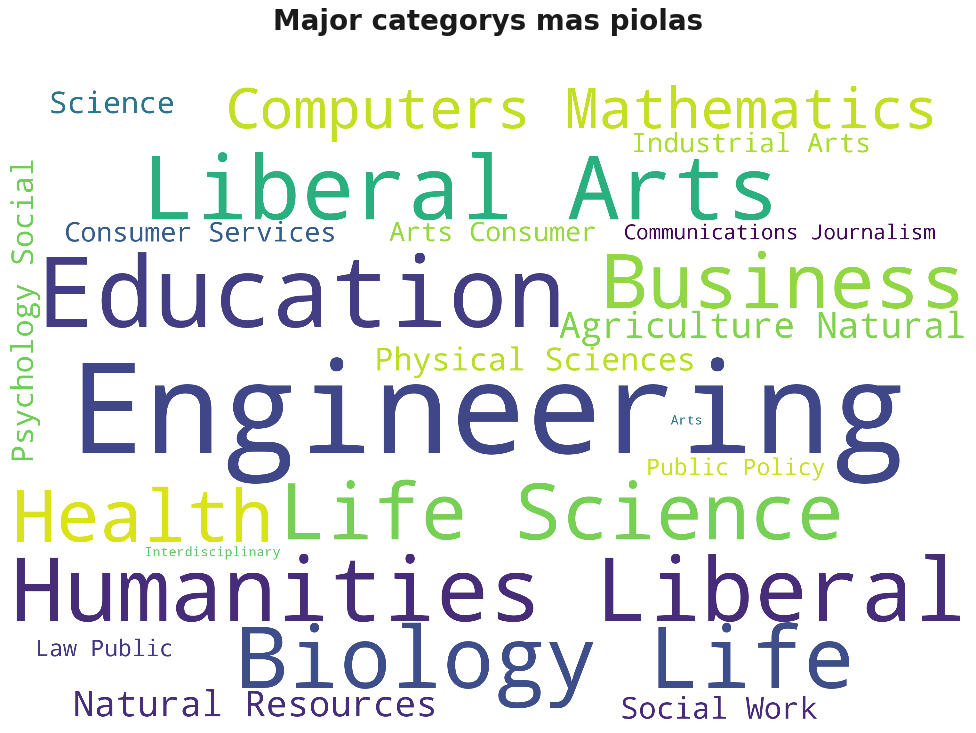

In [223]:
wordcloud = WordCloud(background_color = 'white', width = 3000,
    height = 2000,colormap = 'viridis').generate(texto)

fig = plt.figure(figsize = (20, 10), facecolor = 'w', edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Major categorys mas piolas', fontweight = 'bold',  fontsize = 25, pad = 50.0)

plt.show()

## **Conclusiones**

Extraer conclusiones a partir de los análisis realizados en los puntos anteriores, y justificar cada conclusión.

Por ejemplo:

¿Se encontró algún tipo de comportamiento particular en alguna variable?


¿Existen variables correlacionadas y por qué? ¿Es esperable o no?

---

# **Parte 2 - Preguntas de investigación**

In [239]:
#Para correr en kaggle
#spotify = pd.read_csv('dataset_spotify.csv')

# Para correr en colab
spotify = pd.read_csv('/content/dataset_spotify.csv') 

spotify.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99.0,0.0421,0.726,190440.0,0.554,0.1060,-5.290,0.0917,169.999,0.335
1,Dance,83.0,0.1090,0.775,208787.0,0.613,0.1340,-4.586,0.0542,100.066,0.797
2,Dance,87.0,0.0441,0.737,222653.0,0.636,0.3500,-4.546,0.0437,105.005,0.565
3,Dance,78.0,0.0203,0.586,220573.0,0.701,0.0550,-5.326,0.0416,104.957,0.254
4,Dance,72.0,0.4220,0.728,200773.0,0.646,0.0899,-4.387,0.0463,103.983,0.460


In [240]:
spotify.tail()

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
995,Soul,42.0,0.73300,0.587,146693.0,0.380,0.393,-8.912,0.0251,85.214,0.6380
996,Soul,43.0,0.00152,0.445,175427.0,0.637,0.129,-5.672,0.0342,89.847,0.0863
997,Soul,41.0,0.00280,0.508,303640.0,0.619,0.111,-7.072,0.1950,91.895,0.2470
998,Soul,44.0,0.42600,0.674,246787.0,0.571,0.123,-5.675,0.0842,97.126,0.5110
999,Soul,42.0,0.06440,0.784,200533.0,0.377,0.111,-9.594,0.0326,106.018,0.3410


In [241]:
spotify.shape

(1000, 11)

In [242]:
spotify.describe()

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.557000,0.364932,0.572353,2.483755e+05,0.558100,0.199484,-9.604198,0.090560,116.719245,0.458050
std,16.818252,0.352764,0.192730,1.137751e+05,0.255879,0.179012,6.122038,0.093099,30.049075,0.263528
min,2.000000,0.000006,0.078100,3.316000e+04,0.002930,0.012300,-37.728000,0.023800,52.645000,0.027300
25%,33.000000,0.047300,0.443000,1.926098e+05,0.390750,0.095500,-11.178750,0.037175,92.889750,0.243000
50%,45.000000,0.220000,0.601500,2.246000e+05,0.602500,0.123000,-7.767500,0.049750,115.028500,0.446000
75%,57.000000,0.695750,0.722000,2.764195e+05,0.753000,0.239500,-5.549750,0.095250,136.942750,0.678500
max,99.000000,0.996000,0.951000,1.747733e+06,0.998000,0.987000,-0.762000,0.675000,209.767000,0.980000


In [243]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   float64
 2   acousticness  1000 non-null   float64
 3   danceability  1000 non-null   float64
 4   duration_ms   1000 non-null   float64
 5   energy        1000 non-null   float64
 6   liveness      1000 non-null   float64
 7   loudness      1000 non-null   float64
 8   speechiness   1000 non-null   float64
 9   tempo         1000 non-null   float64
 10  valence       1000 non-null   float64
dtypes: float64(10), object(1)
memory usage: 86.1+ KB


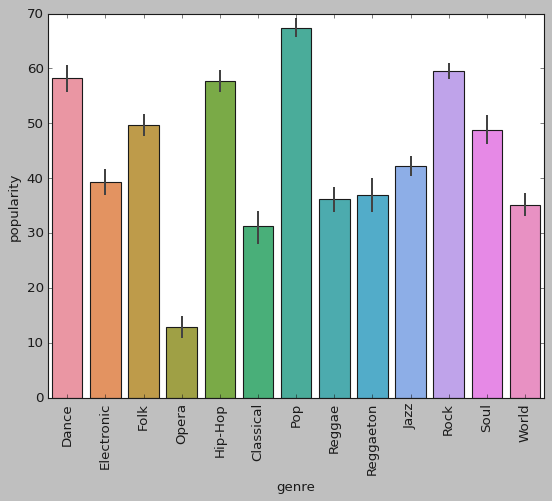

In [245]:
ax = sns.barplot(x="genre", y="popularity", data=spotify)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

## **Preguntas**

1. Que hace que una cancion sea bailable ?
2. A que esta ligada la popularidad de una cancion ?

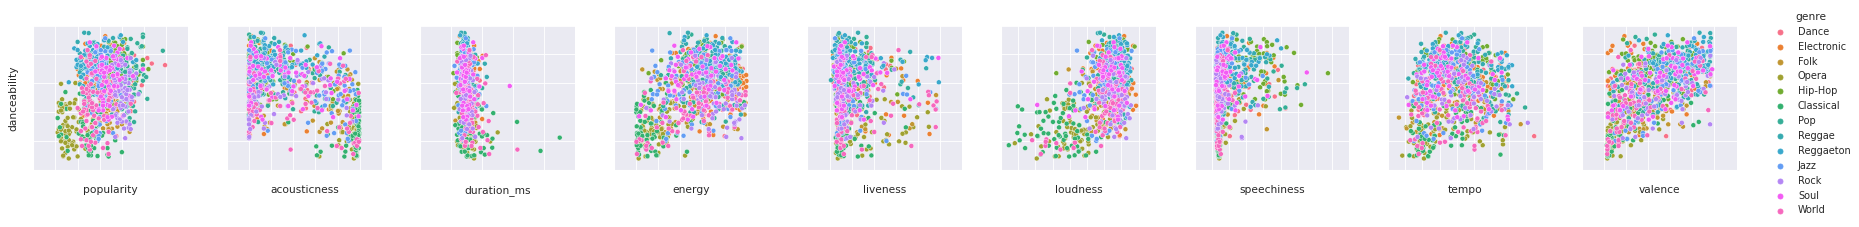

In [277]:
columnas = spotify.columns.to_list()
columnas.remove("danceability")
columnas.remove("genre")

grid = sns.pairplot(data=spotify, y_vars = ["danceability"], x_vars = columnas, hue="genre")

grid.set(xticklabels="", yticklabels="")

plt.show()

In [250]:
correlaciones = spotify.corr()
correlaciones

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.384093,0.343517,-0.143647,0.348773,-0.152342,0.437888,0.157425,0.150414,0.196144
acousticness,-0.384093,1.000000,-0.509468,0.109629,-0.780717,-0.052053,-0.701154,-0.217959,-0.251651,-0.332614
danceability,0.343517,-0.509468,1.000000,-0.234025,0.480013,-0.079208,0.541105,0.240040,0.091998,0.585970
duration_ms,-0.143647,0.109629,-0.234025,1.000000,-0.138519,0.034043,-0.207952,-0.114223,-0.035406,-0.193858
energy,0.348773,-0.780717,0.480013,-0.138519,1.000000,0.096443,0.835121,0.211376,0.257050,0.489998
liveness,-0.152342,-0.052053,-0.079208,0.034043,0.096443,1.000000,0.047255,0.053733,0.041025,-0.023927
loudness,0.437888,-0.701154,0.541105,-0.207952,0.835121,0.047255,1.000000,0.183978,0.229809,0.435113
speechiness,0.157425,-0.217959,0.240040,-0.114223,0.211376,0.053733,0.183978,1.000000,0.151279,0.106052
tempo,0.150414,-0.251651,0.091998,-0.035406,0.257050,0.041025,0.229809,0.151279,1.000000,0.151051
valence,0.196144,-0.332614,0.585970,-0.193858,0.489998,-0.023927,0.435113,0.106052,0.151051,1.000000


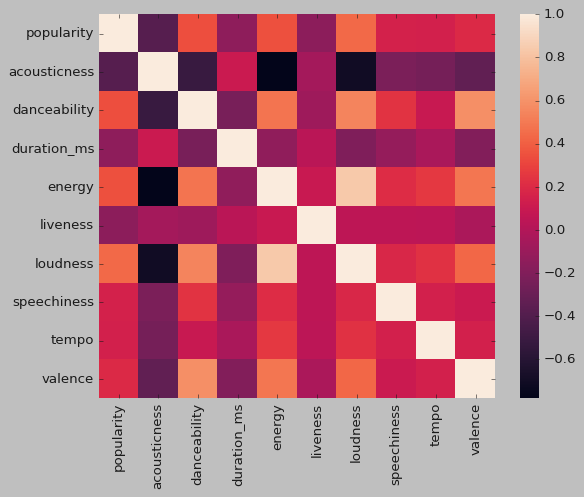

In [251]:
sns.heatmap(correlaciones)

In [252]:
duracion = spotify["duration_ms"] / 60000
duracion.describe()

count    1000.000000
mean        4.139592
std         1.896251
min         0.552667
25%         3.210163
50%         3.743333
75%         4.606992
max        29.128883
Name: duration_ms, dtype: float64

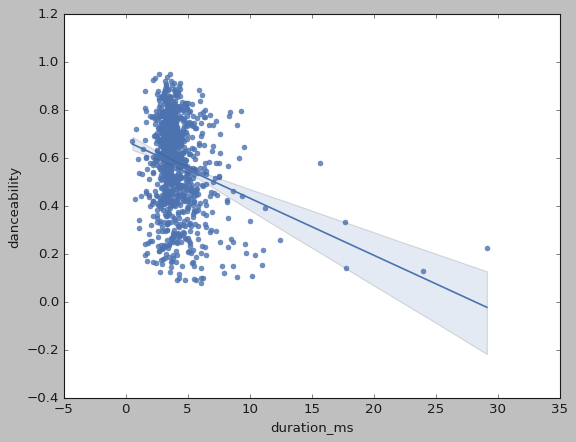

In [254]:
sns.regplot(x = duracion, y = spotify['danceability'])

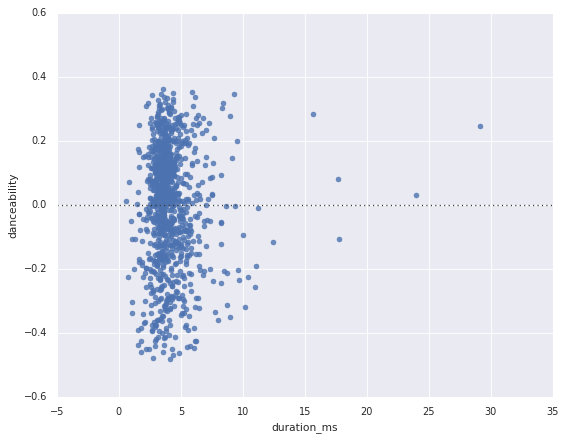

In [280]:
sns.residplot(x = duracion, y = spotify['danceability'])

In [281]:
spotify.corr()


,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.384093,0.343517,-0.143647,0.348773,-0.152342,0.437888,0.157425,0.150414,0.196144
acousticness,-0.384093,1.000000,-0.509468,0.109629,-0.780717,-0.052053,-0.701154,-0.217959,-0.251651,-0.332614
danceability,0.343517,-0.509468,1.000000,-0.234025,0.480013,-0.079208,0.541105,0.240040,0.091998,0.585970
duration_ms,-0.143647,0.109629,-0.234025,1.000000,-0.138519,0.034043,-0.207952,-0.114223,-0.035406,-0.193858
energy,0.348773,-0.780717,0.480013,-0.138519,1.000000,0.096443,0.835121,0.211376,0.257050,0.489998
liveness,-0.152342,-0.052053,-0.079208,0.034043,0.096443,1.000000,0.047255,0.053733,0.041025,-0.023927
loudness,0.437888,-0.701154,0.541105,-0.207952,0.835121,0.047255,1.000000,0.183978,0.229809,0.435113
speechiness,0.157425,-0.217959,0.240040,-0.114223,0.211376,0.053733,0.183978,1.000000,0.151279,0.106052
tempo,0.150414,-0.251651,0.091998,-0.035406,0.257050,0.041025,0.229809,0.151279,1.000000,0.151051
valence,0.196144,-0.332614,0.585970,-0.193858,0.489998,-0.023927,0.435113,0.106052,0.151051,1.000000


NameError: ignored

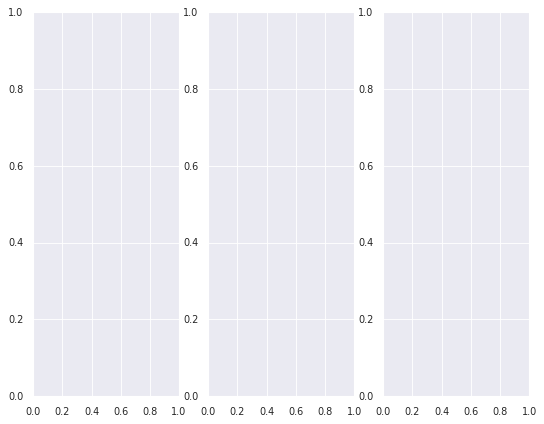

In [282]:
fig, axis = plt.subplots(nrows=1, ncols=3)

sns.regplot(x="energy", y="danceability", data=data, order=2, color="r", scatter=False, ax=axis[0])

sns.regplot(x="energy", y="danceability", data=data, scatter=False, ax=axis[0])

sns.scatterplot(x="energy", y="danceability",data=data, color='#751075', alpha=0.5, ax=axis[0])

fig.set_size_inches((30, 10))

sns.residplot(x="energy", y="danceability", data=data, ax=axis[1], color='#751075')

sns.residplot(x="energy", y="danceability", data=data, order=2, ax=axis[2], color='#751075')

axis[0].set_title("Regresion lineal y cuadratica de bailabilidad en funcion de la energia")

axis[1].set_title("Residuo de la regresion lineal")

axis[2].set_title("Residuo de la regresion cuadratica")

plt.show()